#EDA - Bob Ross Paintings

Team ID: B1 Team 3

Team Members: Kean Zhu, Yihui(Irene) Tang, Yu-Jiun(Janice) Zou, Tzu-Jen(Stephanie) Chen.

##0.Load and Explore the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

##1.Data Overview

In [ ]:
print(f"Dataset size: {bob_ross.shape}")
print("\nColumn types:")

display(bob_ross.head())

Dataset size: (403, 27)

Column types:


,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [ ]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

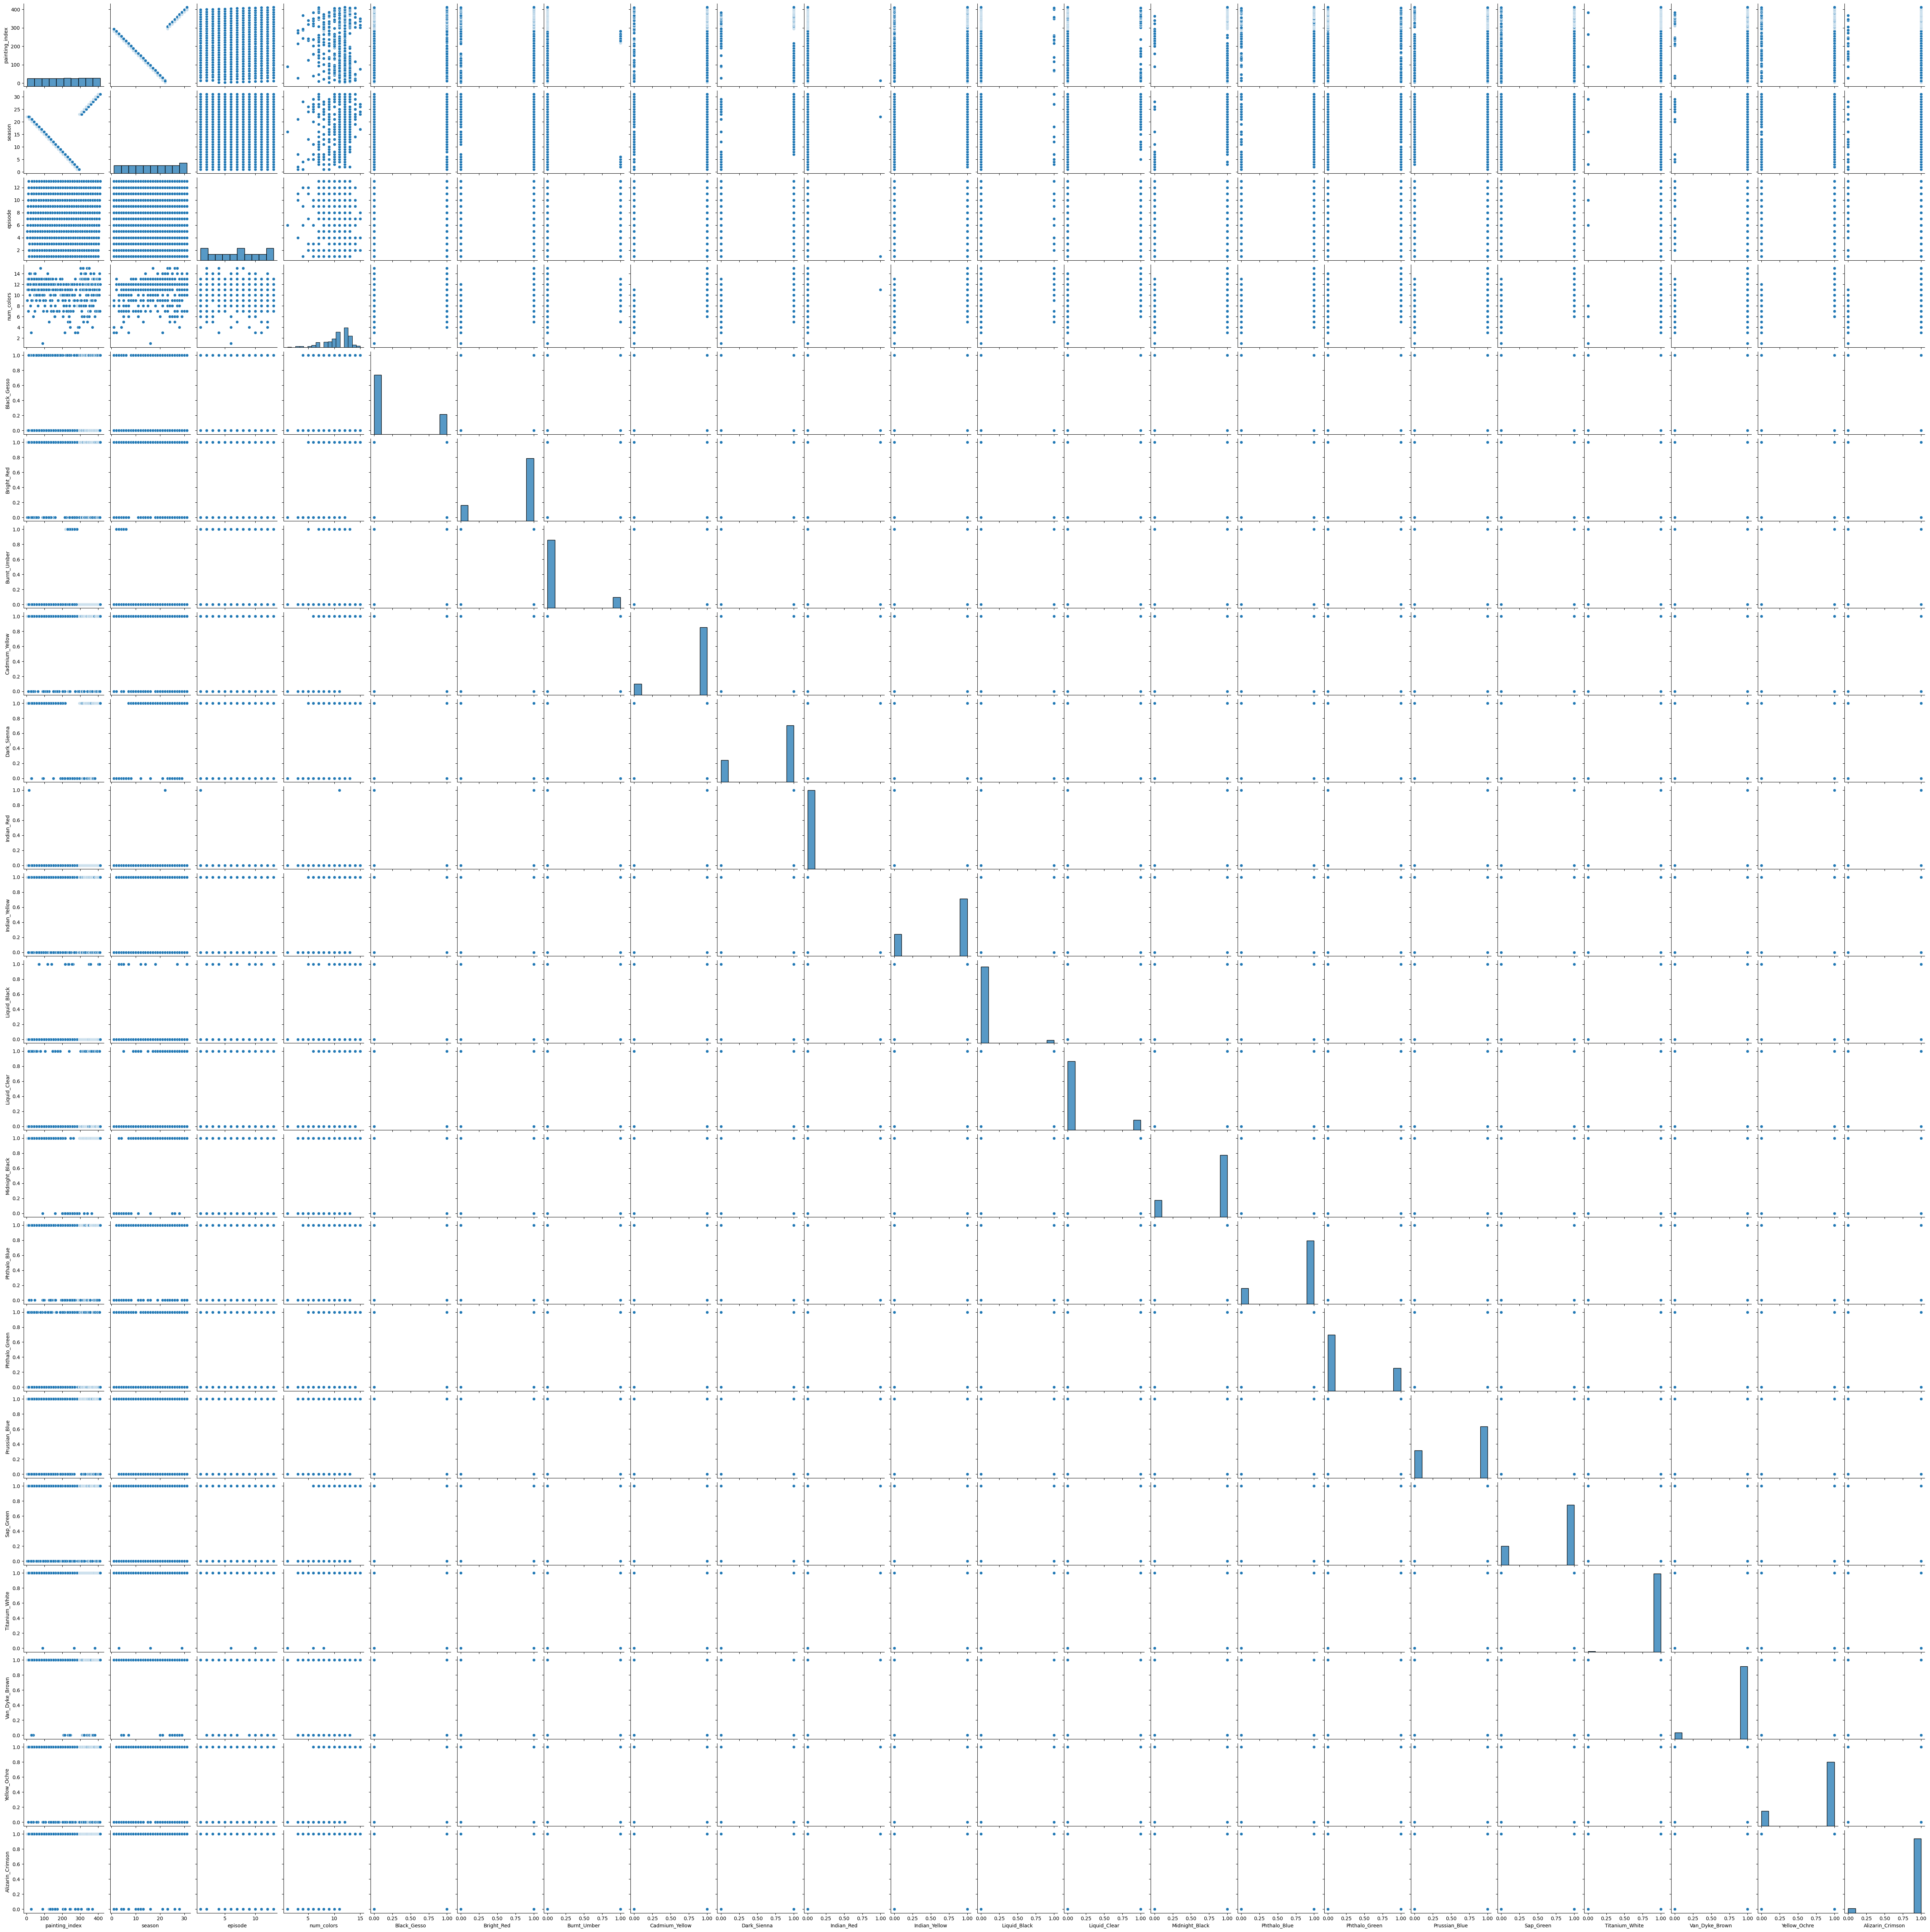

In [ ]:
sns.pairplot(bob_ross)

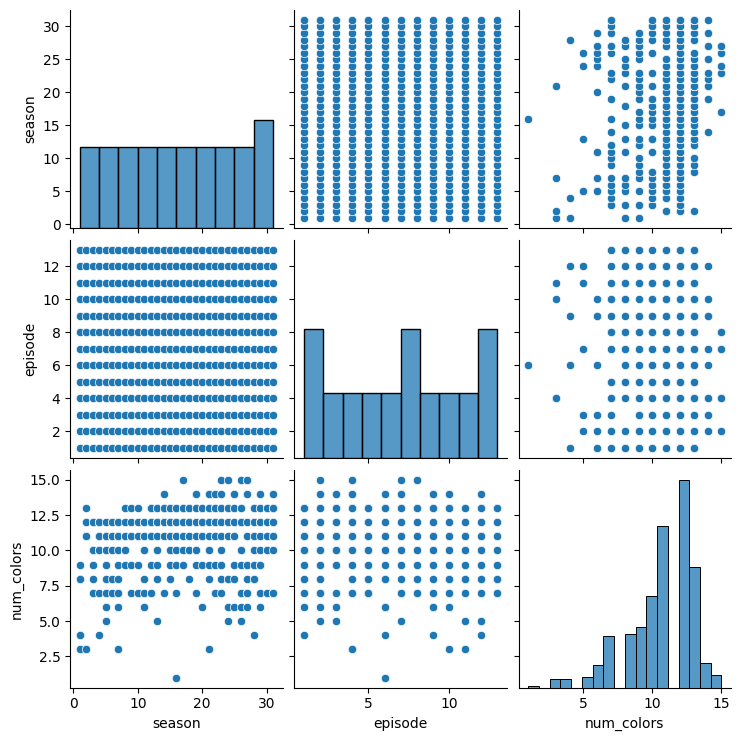

In [ ]:
# Show small group
num_small = bob_ross[["season","episode","num_colors"]].copy()

sns.pairplot(num_small)
plt.show()

The pairplot shows that the number of colors used in Bob Ross paintings is fairly consistent across seasons and episodes, with no stong temporal trend. This suggests that painting complexity is not driven by time but by artistic style.

##2.Checking for Missing Values and Duplicates

###2.1 Missing Values

In [ ]:
if "colors_list" in bob_ross.columns:
    bob_ross = bob_ross.drop(columns=["colors_list"])
if "hex_list" in bob_ross.columns:
    bob_ross = bob_ross.drop(columns=["hex_list"])

# Missing Values
missing = bob_ross.isna().sum()
print("Total missing cells:", int(missing.sum()))

missing_cols = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:")
if len(missing_cols) == 0:
    print("No missing values.")
else:
    display(missing_cols)

Total missing cells: 0
Columns with missing values:
No missing values.


We checked missing values across all columns and the output shows no missing values.

###2.2 Duplicates

In [ ]:
# Duplicates
dup_painting_index = bob_ross["painting_index"].duplicated().sum()
print("Duplicate painting_index:", dup_painting_index)

dup_season_episode = bob_ross.duplicated(subset=["season", "episode"]).sum()
print("Duplicate (season, episode):", dup_season_episode)

if dup_season_episode > 0:
    dup_rows = bob_ross[bob_ross.duplicated(subset=["season","episode"], keep=False)]
    display(dup_rows[["painting_index","season","episode","painting_title"]].sort_values(["season","episode"]))

Duplicate painting_index: 0
Duplicate (season, episode): 0


We checked duplicates using two identifiers. Painting_index and the natural key (season, episode). The results show no duplicates.

###2.3 Range Checks

In [ ]:
# Range Checks
print("season min/max:", bob_ross["season"].min(), bob_ross["season"].max())
print("episode min/max:", bob_ross["episode"].min(), bob_ross["episode"].max())
print("num_colors min/max:", bob_ross["num_colors"].min(), bob_ross["num_colors"].max())

display(bob_ross[["season","episode","num_colors"]].describe())

season min/max: 1 31
episode min/max: 1 13
num_colors min/max: 1 15


,season,episode,num_colors
count,403.00000,403.000000,403.000000
mean,16.00000,7.000000,10.605459
std,8.95539,3.746308,2.378525
min,1.00000,1.000000,1.000000
25%,8.00000,4.000000,9.000000
50%,16.00000,7.000000,11.000000
75%,24.00000,10.000000,12.000000
max,31.00000,13.000000,15.000000


##3.Variable Exploration

###3.1 Summary statistics

In [ ]:
# Summary Statistics
print("Summary statistics of num_colors:")
display(bob_ross["num_colors"].describe())

Summary statistics of num_colors:


,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


###3.2 Distribution

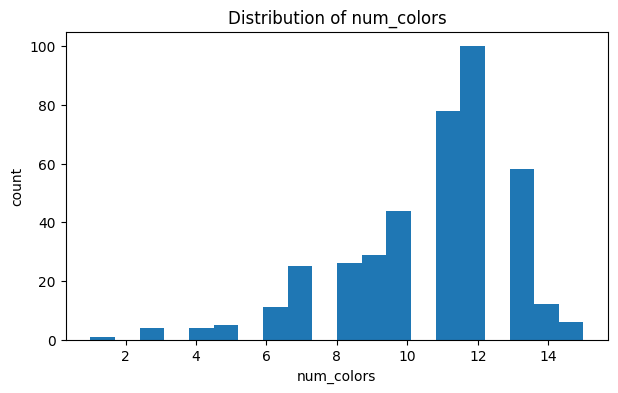

In [ ]:
# Distribution of num_colors
plt.figure(figsize=(7,4))
plt.hist(bob_ross["num_colors"], bins=20)
plt.title("Distribution of num_colors")
plt.xlabel("num_colors")
plt.ylabel("count")
plt.show()

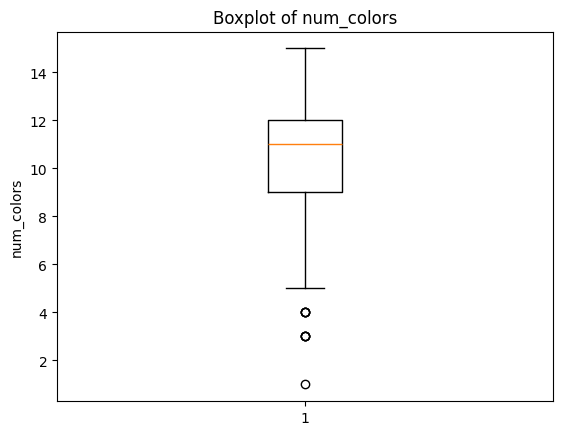

In [ ]:
plt.figure()
plt.boxplot(bob_ross["num_colors"].dropna())
plt.title("Boxplot of num_colors")
plt.ylabel("num_colors")
plt.show()


The distribution of colors shows that most paintings use a moderate number of colors (9-13), indicating a consistent of visual complexity across works.

The boxplot shows that hte number of colors used in the paintings is tightly concentrated around the median, with only a few outliers.

###3.3 Extremes

In [ ]:
# show extremes
min_row = bob_ross.loc[bob_ross["num_colors"].idxmin(), ["painting_title","season","episode","num_colors"]]
max_val = bob_ross["num_colors"].max()
max_rows = bob_ross.loc[bob_ross["num_colors"] == max_val, ["painting_title","season","episode","num_colors"]]

print("Min num_colors example:")
display(min_row.to_frame().T)

print("Max num_colors examples (first 10):")
display(max_rows.head(10))

Min num_colors example:


,painting_title,season,episode,num_colors
200,Contemplative Lady,16,6,1


Max num_colors examples (first 10):


,painting_title,season,episode,num_colors
214,Spectacular Waterfall,17,7,15
293,Valley Waterfall,23,8,15
306,Graceful Waterfall,24,8,15
328,Lake in the Valley,26,4,15
339,Angler's Haven,27,2,15
341,Wilderness Falls,27,4,15


Extreme cases shows that paintings with very few colors are rare, while paintings with the maximum number of colors tend to be more complex, this suggests that it captures the differences in painting style rather than random variation.

Several high number of colors paintings have related to natural secnes such as waterfalls or landscpes, suggesting that visually rich scenes may be associated with higher color usage.

##4.Identify Paint Indicator Columns and Imbalance

In [ ]:
paint_bool_cols = bob_ross.select_dtypes(include=["bool"]).columns.tolist()
print("Number of boolean paint columns:", len(paint_bool_cols))
print("Example paint columns:", paint_bool_cols[:8])

X_paint_df = bob_ross[paint_bool_cols].astype(int)

X_paint_mat = X_paint_df.to_numpy(dtype=bool)

Number of boolean paint columns: 18
Example paint columns: ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black']


In [ ]:
exclude = {"painting_index","img_src","painting_title","season","episode","num_colors",
           "youtube_src","colors","color_hex"}

paint_like_cols = []
for c in bob_ross.columns:
    if c in exclude:
        continue
    if bob_ross[c].dtype == bool:
        paint_like_cols.append(c)
    else:
        vals = set(bob_ross[c].dropna().unique())
        if vals.issubset({0, 1}):
            paint_like_cols.append(c)

print("Number of paint-like columns:", len(paint_like_cols))

Number of paint-like columns: 18


The dataset contains 18 binary paint indicator columns, each representing whether a specific color is used in a painting.

In [ ]:
X = bob_ross[paint_like_cols].copy()

for c in paint_like_cols:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

usage_rate = X.mean().sort_values(ascending=False)

print("Top 10 most used paints:")
display(usage_rate.head(10))

print("Bottom 10 least used paints:")
display(usage_rate.tail(10))

Top 10 most used paints:


,0
Titanium_White,0.992556
Alizarin_Crimson,0.942928
Van_Dyke_Brown,0.920596
Cadmium_Yellow,0.858561
Yellow_Ochre,0.811414
Phthalo_Blue,0.801489
Bright_Red,0.796526
Midnight_Black,0.786600
Sap_Green,0.759305
Indian_Yellow,0.724566


Bottom 10 least used paints:


,0
Sap_Green,0.759305
Indian_Yellow,0.724566
Dark_Sienna,0.719603
Prussian_Blue,0.652605
Phthalo_Green,0.287841
Black_Gesso,0.250620
Burnt_Umber,0.136476
Liquid_Clear,0.126551
Liquid_Black,0.034739
Indian_Red,0.002481


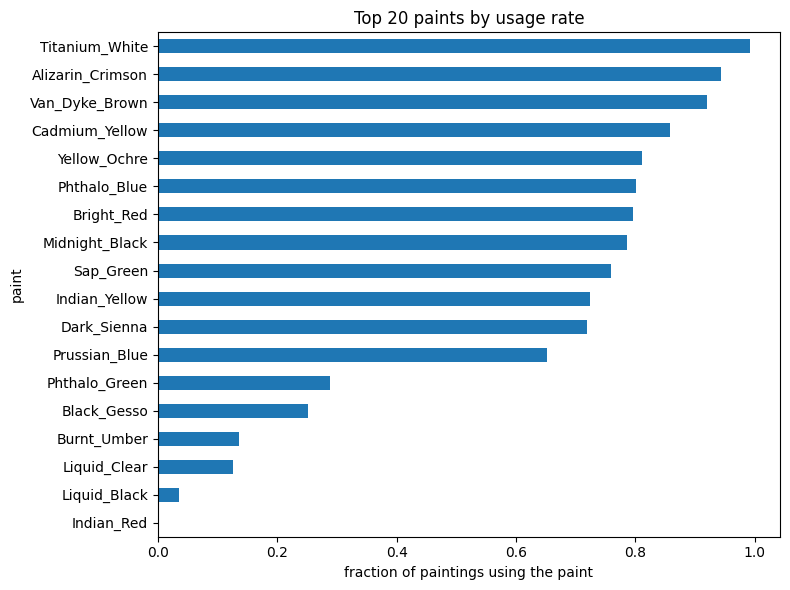

In [ ]:
# Plot top 20 usage rates
topN = 20
plt.figure(figsize=(8,6))
usage_rate.head(topN).sort_values().plot(kind="barh")
plt.title(f"Top {topN} paints by usage rate")
plt.xlabel("fraction of paintings using the paint")
plt.ylabel("paint")
plt.tight_layout()
plt.show()

Paint usage is also highly imbalanced across the 18 indicators, where a small set of core paints appears in nearly all paintings, most notably Titanium White (0.9926), Alizarin Crimson (0.9429), and Van Dyke Brown (0.9206).

##5.Season patterns

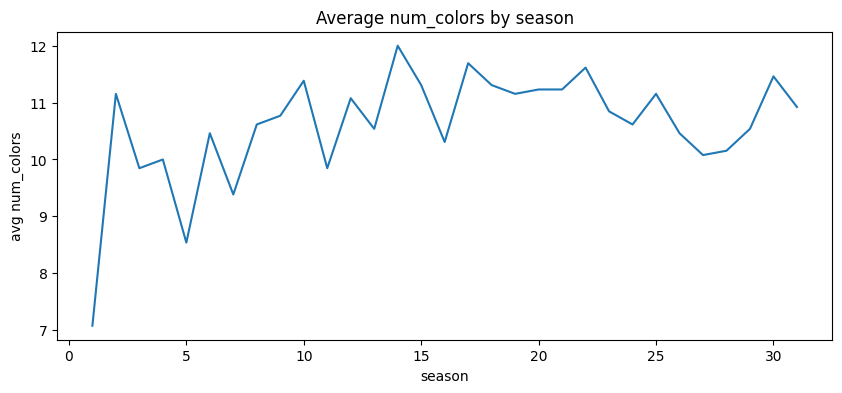

In [ ]:
season_mean = bob_ross.groupby("season")["num_colors"].mean()

plt.figure(figsize=(10,4))
plt.plot(season_mean.index, season_mean.values)
plt.title("Average num_colors by season")
plt.xlabel("season")
plt.ylabel("avg num_colors")
plt.show()

The average number of colors per painting increases slightly and becomes more stable across later seasons. This suggests that Bob Ross's painting style converged to a consistent level of color complexity over time.

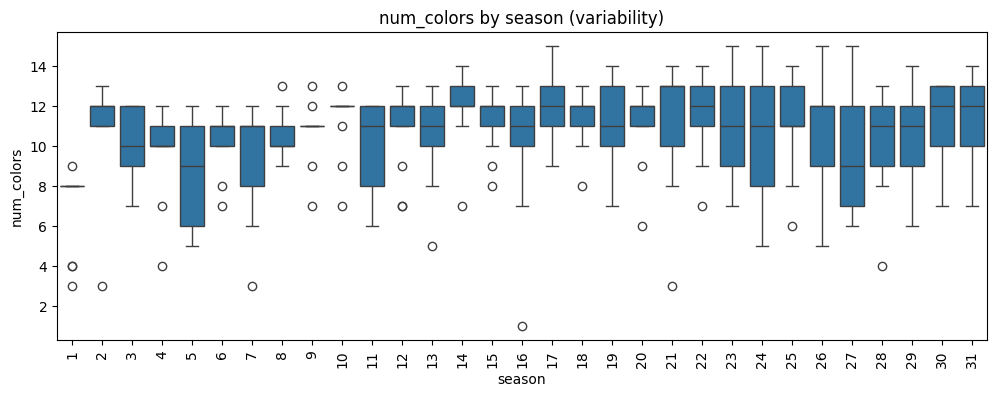

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(x="season", y="num_colors", data=bob_ross)
plt.title("num_colors by season (variability)")
plt.xticks(rotation=90)
plt.show()

This boxplot shows that while the average number of colors per painting is relatively stable across seasons, some seasons show much greater variation.

Later seasons show reduced extremely low color counts, but greater spread among mediun to high color usage, suggesting that paintings become consistently more complex while still varies between paintings.

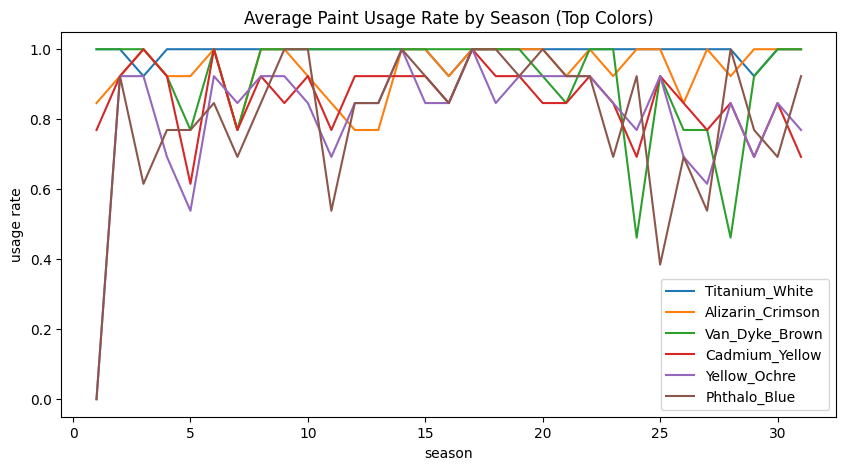

In [ ]:
top_paints = usage_rate.head(6).index.tolist()
season_paint = X.join(bob_ross["season"]).groupby("season")[top_paints].mean()

plt.figure(figsize=(10,5))
for c in top_paints:
    plt.plot(season_paint.index, season_paint[c], label=c)
plt.title("Average Paint Usage Rate by Season (Top Colors)")
plt.xlabel("season")
plt.ylabel("usage rate")
plt.legend()
plt.show()


The most frequently used paints maintain consistently high usage rates across seasons, showing a stable core palette in Bob Ross's paintings, while a smaller number of colors reflect seasonal fluctuations.

The coexistence of stable and variable paint usage suggests both core features and seasons-dependent variation in painting styles, making it suitable for futher clustering.



##6.Co-occurrence

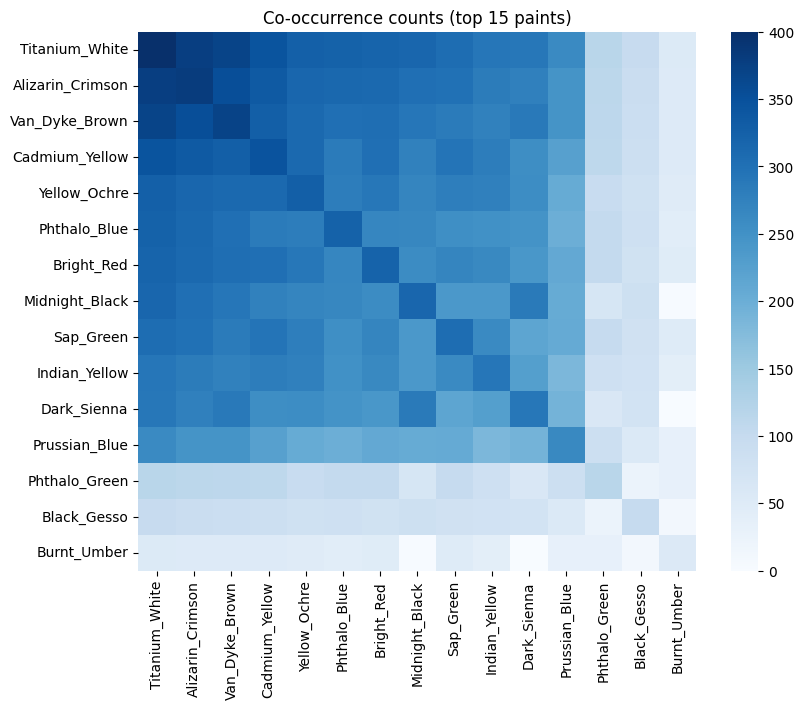

In [ ]:
co = X.T.dot(X)

topM = 15
top_list = usage_rate.head(topM).index.tolist()
co_top = co.loc[top_list, top_list]

plt.figure(figsize=(9,7))
sns.heatmap(co_top, cmap="Blues")
plt.title(f"Co-occurrence counts (top {topM} paints)")
plt.show()

In [ ]:
pairs = []
for i in range(len(top_list)):
    for j in range(i+1, len(top_list)):
        a = top_list[i]
        b = top_list[j]
        pairs.append([a, b, int(co.loc[a, b])])

pairs_df = pd.DataFrame(pairs, columns=["paint_a","paint_b","co_count"])
pairs_df = pairs_df.sort_values("co_count", ascending=False)

print("Top 15 co-occurring paint pairs:")
display(pairs_df.head(15))

Top 15 co-occurring paint pairs:


,paint_a,paint_b,co_count
0,Titanium_White,Alizarin_Crimson,378
1,Titanium_White,Van_Dyke_Brown,369
14,Alizarin_Crimson,Van_Dyke_Brown,354
2,Titanium_White,Cadmium_Yellow,345
15,Alizarin_Crimson,Cadmium_Yellow,335
27,Van_Dyke_Brown,Cadmium_Yellow,327
3,Titanium_White,Yellow_Ochre,326
4,Titanium_White,Phthalo_Blue,323
5,Titanium_White,Bright_Red,319
16,Alizarin_Crimson,Yellow_Ochre,317


The co-occurrence heatmap reveals overall grouping patterns among paints, with the top co-occurrence paint pairs table highlights the exact paint pairs that drive those patterns, suggesting systematic combinations rather than independent choices.

##7.Similarity

###7.1 Similarity Distribution

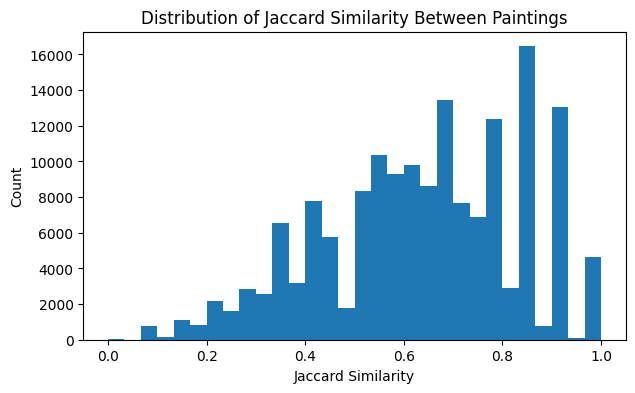

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D = pairwise_distances(X_paint_mat, metric="jaccard")
S = 1 - D

np.fill_diagonal(S, np.nan)
sim_vals = S[~np.isnan(S)].ravel()

plt.figure(figsize=(7,4))
plt.hist(sim_vals, bins=30)
plt.title("Distribution of Jaccard Similarity Between Paintings")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Count")
plt.show()

In [ ]:
print("Similarity summary:")
print(pd.Series(sim_vals).describe())

Similarity summary:
count    162006.000000
mean          0.634615
std           0.200912
min           0.000000
25%           0.500000
50%           0.642857
75%           0.785714
max           1.000000
dtype: float64


The similarity distribution shows that most paintings share a moderate to high level of paint overlap, and the most common exact paint recipe appears in dozens of paintings. This pattern indicates a consistent core palette across Bob Ross's work.

This similarity structure motivate the use of clustering methods to identify goups of paintings with similar color palettes.

###7.2 Nearest Neighbors

In [ ]:
meta_cols = ["painting_index", "season", "episode", "painting_title", "num_colors"]
meta_cols = [c for c in meta_cols if c in bob_ross.columns]

def topk_neighbors(i, k=5, S_mat=None):
    sims = S_mat[i].copy()
    sims[i] = -np.inf
    nn_idx = np.argsort(sims)[-k:][::-1]
    return nn_idx, sims[nn_idx]

example_i = 2
nn_idx, nn_sim = topk_neighbors(example_i, k=5, S_mat=S)

print("Query painting:")
display(bob_ross.loc[[example_i], meta_cols])

Query painting:


,painting_index,season,episode,painting_title,num_colors
2,284,1,3,Ebony Sunset,9


In [ ]:
neighbors = bob_ross.loc[nn_idx, meta_cols].copy()
neighbors["jaccard_similarity"] = nn_sim
print("Top-5 nearest neighbors:")
display(neighbors)

Top-5 nearest neighbors:


,painting_index,season,episode,painting_title,num_colors,jaccard_similarity
0,282,1,1,A Walk in the Woods,8,0.888889
12,294,1,13,Final Reflections,8,0.888889
7,289,1,8,Peaceful Valley,8,0.888889
6,288,1,7,Autumn Mountain,8,0.888889
4,286,1,5,Quiet Stream,8,0.888889


We compute Jaccard similarity between paintings based on paint usage and retrieve the top-k nearest neighbors for a selected painting.

The nearest neighbors of the query painting show very high Jaccard similarity and similar palette sizes, indicating that paintings using nearly identical sets of paints are correctly idetified as similar.

###7.3 Near-duplicates

In [ ]:
n = len(bob_ross)
pairs = []

for i in range(n):
    for j in range(i+1, n):
        pairs.append((i, j, S[i, j]))

pairs_df = pd.DataFrame(pairs, columns=["i", "j", "jaccard_similarity"]).sort_values(
    "jaccard_similarity", ascending=False
)

print("Top 20 most similar pairs:")
display(pairs_df.head(20))

threshold = 0.95
near_dup = pairs_df[pairs_df["jaccard_similarity"] >= threshold]
print(f"Number of pairs with similarity >= {threshold}: {len(near_dup)}")
display(near_dup.head(20))

Top 20 most similar pairs:


,i,j,jaccard_similarity
70531,257,371,1.0
70528,257,368,1.0
70664,258,360,1.0
70516,257,356,1.0
70513,257,353,1.0
70511,257,351,1.0
70496,257,336,1.0
70492,257,332,1.0
70487,257,327,1.0
70479,257,319,1.0


Number of pairs with similarity >= 0.95: 2330


,i,j,jaccard_similarity
70531,257,371,1.0
70528,257,368,1.0
70664,258,360,1.0
70516,257,356,1.0
70513,257,353,1.0
70511,257,351,1.0
70496,257,336,1.0
70492,257,332,1.0
70487,257,327,1.0
70479,257,319,1.0


In [ ]:
recipe_sizes = (
    bob_ross.groupby(paint_bool_cols, dropna=False)
            .size()
            .sort_values(ascending=False)
            .reset_index(name="n_paintings")
)

print("Top 10 most common exact paint recipes:")
display(recipe_sizes.head(10))

top_recipe = recipe_sizes.loc[0, paint_bool_cols].to_dict()

mask = np.ones(len(bob_ross), dtype=bool)
for c in paint_bool_cols:
    mask &= (bob_ross[c] == top_recipe[c])

meta_cols = ["painting_index", "season", "episode", "painting_title", "num_colors"]
meta_cols = [c for c in meta_cols if c in bob_ross.columns]

print("Paintings using the most common recipe:")
display(bob_ross.loc[mask, meta_cols].sort_values(["season", "episode"]))

Top 10 most common exact paint recipes:


,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson,n_paintings
0,False,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True,46
1,False,True,False,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True,32
2,False,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True,24
3,True,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True,17
4,False,True,False,True,True,False,True,False,False,True,False,False,True,True,True,True,True,True,14
5,False,True,True,True,False,False,True,False,False,False,True,True,True,True,True,True,True,True,13
6,True,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True,9
7,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True,9
8,False,True,True,True,False,False,True,False,False,False,True,True,False,True,True,True,True,True,8
9,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False,True,7


Paintings using the most common recipe:


,painting_index,season,episode,painting_title,num_colors
118,164,10,2,Cabin at Sunset,12
119,165,10,3,Twin Falls,12
120,166,10,4,Secluded Bridge,12
122,168,10,6,Autumn Woods,12
127,174,10,11,Triple View,12
129,176,10,13,Lakeside Cabin,12
130,150,11,1,Mountain Stream,12
133,153,11,4,Hidden Stream,12
136,156,11,7,Lakeside Path,12
144,138,12,2,Mountain Reflections,12


In [ ]:
cols = ["n_paintings"] + paint_bool_cols
display(recipe_sizes[cols].head(10))

,n_paintings,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,46,False,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True
1,32,False,True,False,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True
2,24,False,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True
3,17,True,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True
4,14,False,True,False,True,True,False,True,False,False,True,False,False,True,True,True,True,True,True
5,13,False,True,True,True,False,False,True,False,False,False,True,True,True,True,True,True,True,True
6,9,True,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True
7,9,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True
8,8,False,True,True,True,False,False,True,False,False,False,True,True,False,True,True,True,True,True
9,7,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False,True


,count
season,
10,6
11,3
12,4
13,3
14,2
15,4
16,1
17,1
18,1


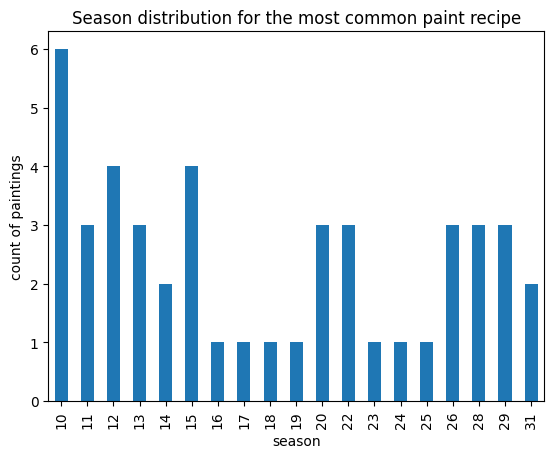

In [ ]:
top_recipe_paintings = bob_ross.loc[mask].copy()

season_counts = top_recipe_paintings["season"].value_counts().sort_index()
display(season_counts)

plt.figure()
season_counts.plot(kind="bar")
plt.title("Season distribution for the most common paint recipe")
plt.xlabel("season")
plt.ylabel("count of paintings")
plt.show()

Using a near-duplicate threshold of 0.95, we identified 2,330 highly similar pairs, indicating substantial repetition or templating in palette composition. This tendency is also evident at the exact-recipe level, where the most frequent paint recipe appears in 46 paintings.

In conculsion, the results suggest that palette choices follow a small set of recurring templates with limited variation, creating clear opportunities to define interpretable groupings and boundaries within an otherwise consistent instructional series.

##8.Correlation

Number of paint columns: 18


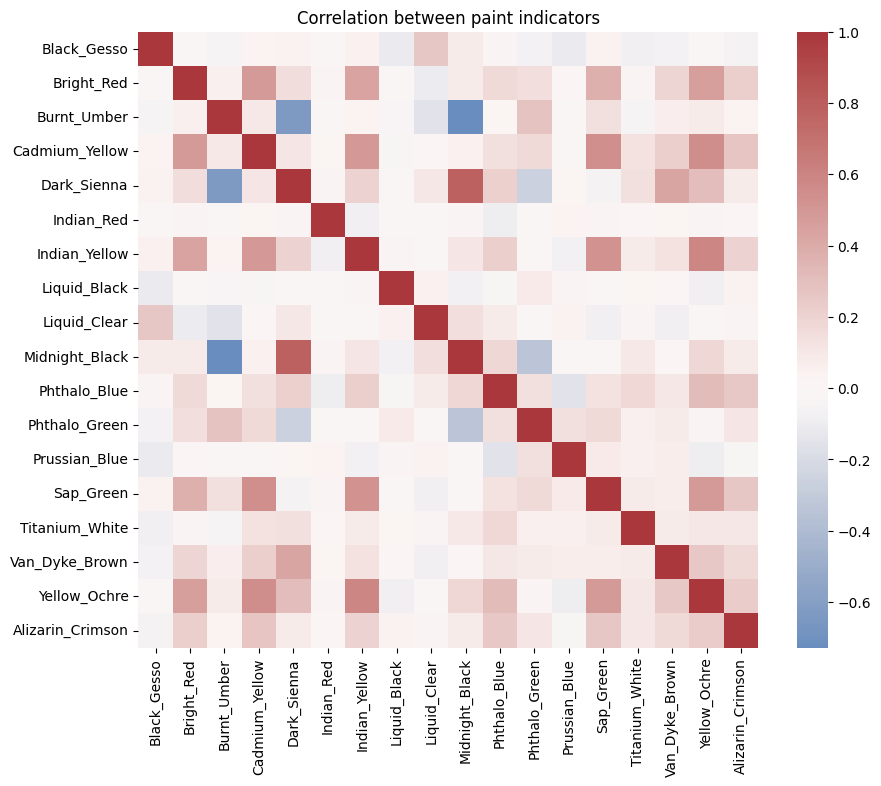

In [ ]:
paint_cols = []
for c in bob_ross.columns:
    if bob_ross[c].dtype == bool:
        paint_cols.append(c)
    else:
        vals = bob_ross[c].dropna().unique()
        if len(vals) > 0 and set(vals).issubset({0, 1}):
            if c not in ["painting_index", "season", "episode", "num_colors"]:
                paint_cols.append(c)

print("Number of paint columns:", len(paint_cols))

X = bob_ross[paint_cols].copy()
for c in paint_cols:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

corr_paint = X.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_paint, cmap="vlag", center=0)
plt.title("Correlation between paint indicators")
plt.show()

The correlation heatmap shows that most paint indicators have weak pairwise correlations, indicating that individual paint choices are largely independent. However, a small number of paint pairs exhibit moderate positive correlations, suggesting stable co-usage patterns, while a few negative correlations indicate substitute relationships.

#Questions:

- Do high-similarity pairs concentrate within the same season, suggesting localized style phases?

- To what extent do the most frequently used paints drive overall similarity, how does the similarity distribution change if the top one or two paints are removed from the feature set?

- Has palette similarity increased over time, are paintings in later seasons more similar to their nearest neighbors than paintings in earlier seasons?

- Which paint pairs form the most stable combinations once base paint popularity is accounted for?


# **M2-Kean's part**

##**BUSINESS QUESTION:**

What are the potential structures in Bob Ross paintings based on how paint colors are combined, and do these structures reveal distinct palette styles?

##**1.Hierarchical Clustering**

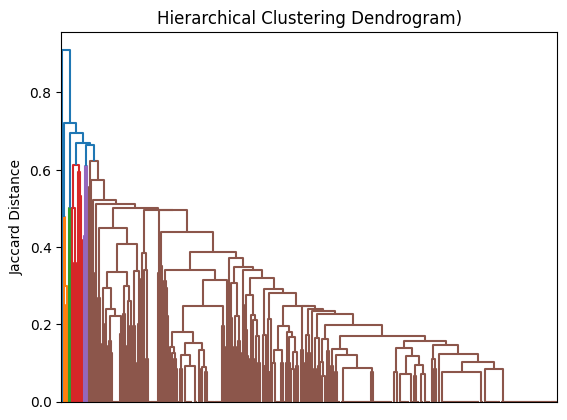

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

#“Reformat the distance as expected
D_compressed = squareform(D, checks=False)
Z_avg = linkage(D_compressed, method="average")

dendrogram(Z_avg, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram)")
plt.ylabel("Jaccard Distance")
plt.show()

The dendrogram shows that many Bob Ross paintings cluster together at very low Jaccard distances, indicating he frequently reused very similar paint palettes across different works. These low-height merges suggest recurring group of color combinations rather than entirely unique palettes for each painting. At the same time, a smaller number of branches only merge at much higher distances, highlighting some paintings with more distinctive or unusual paint choices.

cut the dendrogran into clusters

In [ ]:
for k in [3, 4, 5, 6]:
    cluster_labels = fcluster(Z_avg, t=k, criterion="maxclust")

bob_ross['cluster_label'] = cluster_labels
display(bob_ross.head())

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson,cluster_label
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,True,True,True,True,True,False,True,5
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,True,True,True,True,True,False,True,5
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,True,True,True,True,True,False,True,5
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,True,False,True,True,False,False,1
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,True,True,True,True,True,False,True,5


In [ ]:
print("Distribution of paintings per cluster:")
display(bob_ross['cluster_label'].value_counts().sort_index())

Distribution of paintings per cluster:


,count
cluster_label,
1,5
2,2
3,10
4,4
5,381
6,1


One cluster contains almost everything (381 / 403 ≈ 95%), showing Bob Ross paintings are extremely similar in palette usage and there is one dominant “core palette regime”

The remaining clusters are most likely rare variants or outliers.

In [ ]:
print("Average number of colors per cluster:")
display(bob_ross.groupby('cluster_label')['num_colors'].mean())

Average number of colors per cluster:


,num_colors
cluster_label,
1,4.000000
2,6.000000
3,5.500000
4,5.500000
5,10.929134
6,1.000000


Pick k=4

In [ ]:
k = 4
bob_ross["cluster_k4"] = fcluster(Z_avg, t=k, criterion="maxclust")
bob_ross["cluster_k4"].value_counts().sort_index()

,count
cluster_k4,
1,5
2,2
3,395
4,1


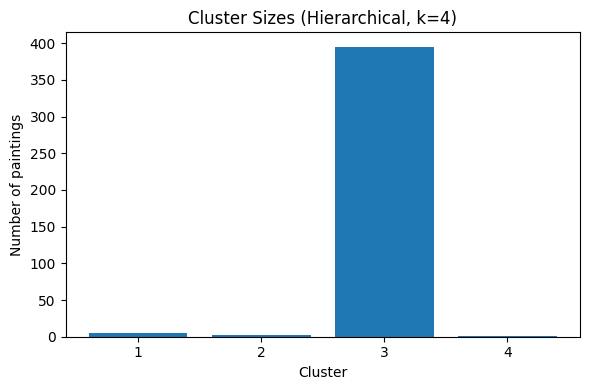

In [ ]:
counts = bob_ross["cluster_k4"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of paintings")
plt.title("Cluster Sizes (Hierarchical, k=4)")
plt.tight_layout()
plt.show()


In [ ]:
paint_cols = bob_ross.select_dtypes(include=["bool"]).columns.tolist()

cluster_profile = bob_ross.groupby("cluster_k4")[paint_cols].mean()
display(cluster_profile)


,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster_k4,,,,,,,,,,,,,,,,,,
1,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.400000
2,0.500000,1.000000,1.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.5,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.250633,0.807595,0.134177,0.873418,0.734177,0.002532,0.734177,0.032911,0.129114,0.8,0.817722,0.293671,0.648101,0.774684,0.994937,0.924051,0.827848,0.956962
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


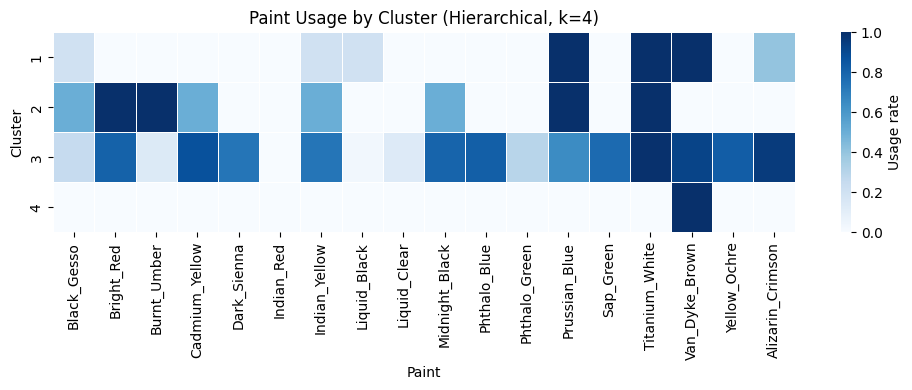

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(
    cluster_profile,
    cmap="Blues",
    cbar_kws={"label": "Usage rate"},
    linewidths=0.5
)
plt.xlabel("Paint")
plt.ylabel("Cluster")
plt.title("Paint Usage by Cluster (Hierarchical, k=4)")
plt.tight_layout()
plt.show()


To see what makes each cluster different:

In [ ]:
overall_usage = bob_ross[paint_cols].mean()

chosen_cluster = 1
diff_for_cluster = cluster_profile.loc[chosen_cluster] - overall_usage

print("Paints more used than overall average")
display(diff_for_cluster.sort_values(ascending=False).head(3).to_frame("Usage_vs_Overall_Average"))

print("Paints less used than overall average")
display(diff_for_cluster.sort_values(ascending=True).head(3).to_frame("Usage_vs_Overall_Average"))

Paints more used than overall average


,Usage_vs_Overall_Average
Prussian_Blue,0.347395
Liquid_Black,0.165261
Van_Dyke_Brown,0.079404


Paints less used than overall average


,Usage_vs_Overall_Average
Cadmium_Yellow,-0.858561
Yellow_Ochre,-0.811414
Phthalo_Blue,-0.801489


In this cluster, it doesn't heavily feature top overall paints like Bright Red or Cadmium Yellow, it exhibits a comparatively higher usage of Van Dyke Brown, Yellow Ochre, and Alizarin Crimson relative to other colors within its own limited palette, suggesting a muted, earthy tone focus.

In [ ]:
chosen_cluster = 2
diff_for_cluster = cluster_profile.loc[chosen_cluster] - overall_usage

print("Paints more used than overall average")
display(diff_for_cluster.sort_values(ascending=False).head(3).to_frame("Usage_vs_Overall_Average"))

print("Paints less used than overall average")
display(diff_for_cluster.sort_values(ascending=True).head(3).to_frame("Usage_vs_Overall_Average"))

Paints more used than overall average


,Usage_vs_Overall_Average
Burnt_Umber,0.863524
Prussian_Blue,0.347395
Black_Gesso,0.249380


Paints less used than overall average


,Usage_vs_Overall_Average
Alizarin_Crimson,-0.942928
Van_Dyke_Brown,-0.920596
Yellow_Ochre,-0.811414


 This cluster showing elevated usage of colors like Bright Red, Burnt Umber, and Phthalo Green compared to the average. This indicates these paintings might feature more vibrant or specific landscape elements that require these particular hues more frequently.

In [ ]:
chosen_cluster = 3
diff_for_cluster = cluster_profile.loc[chosen_cluster] - overall_usage

print("Paints more used than overall average")
display(diff_for_cluster.sort_values(ascending=False).head(3).to_frame("Usage_vs_Overall_Average"))

print("Paints less used than overall average")
display(diff_for_cluster.sort_values(ascending=True).head(3).to_frame("Usage_vs_Overall_Average"))

Paints more used than overall average


,Usage_vs_Overall_Average
Yellow_Ochre,0.016434
Phthalo_Blue,0.016233
Sap_Green,0.015378


Paints less used than overall average


,Usage_vs_Overall_Average
Prussian_Blue,-0.004504
Burnt_Umber,-0.002299
Liquid_Black,-0.001828


 As the dominant cluster, this paint usage closely mirrors the overall average. This is expected, as it represents the vast majority of paintings. The slight variations highlight subtle preferences, but generally, this cluster reflects Bob Ross's most common and consistent palette choices.



In [ ]:
chosen_cluster = 4
diff_for_cluster = cluster_profile.loc[chosen_cluster] - overall_usage

print("Paints more used than overall average")
display(diff_for_cluster.sort_values(ascending=False).head(3).to_frame("Usage_vs_Overall_Average"))

print("Paints less used than overall average")
display(diff_for_cluster.sort_values(ascending=True).head(3).to_frame("Usage_vs_Overall_Average"))

Paints more used than overall average


,Usage_vs_Overall_Average
Van_Dyke_Brown,0.079404
Indian_Red,-0.002481
Liquid_Black,-0.034739


Paints less used than overall average


,Usage_vs_Overall_Average
Titanium_White,-0.992556
Alizarin_Crimson,-0.942928
Cadmium_Yellow,-0.858561


Thisi is an outlier with a very limited and distinct palette, possibly a monochrome or highly subdued piece.



Within-cluster similarity vs overall similarity Comparison:

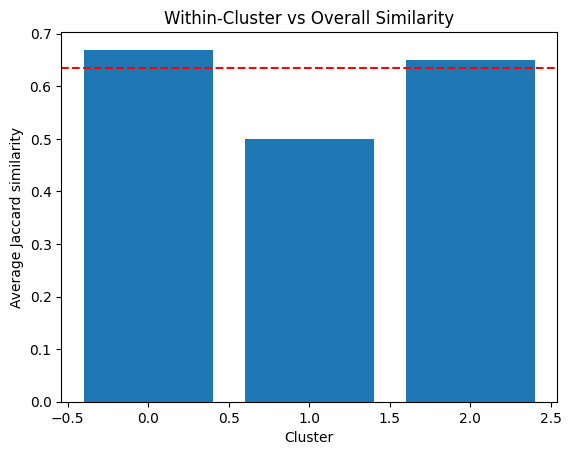

In [ ]:
np.fill_diagonal(S, np.nan)
#sets the diagonal elements of the Jaccard similarity matrix S to NaN.
#to ensure that when calculate average similarities, a painting's perfect self-similarity(1) doesn't skew the results.

overall_similarity = np.nanmean(S) #calculates the arithmetic mean of an array or matrix, butignores NaN values.

within = []
for c in sorted(bob_ross["cluster_k4"].unique()):
    idx = np.where(bob_ross["cluster_k4"].values == c)[0]
    if len(idx) > 1:
        within.append(np.nanmean(S[np.ix_(idx, idx)])) #takes idx (array of selected painting indices) and returns a tuple of two arrays: ([idx_array], [idx_array]). -convert  single list of indices into a format that can select a rectangular sub-matrix from S.

plt.bar(range(len(within)), within)
plt.axhline(overall_similarity, linestyle="--", color='red', label='Overall Similarity')
plt.xlabel("Cluster")
plt.ylabel("Average Jaccard similarity")
plt.title("Within-Cluster vs Overall Similarity")
plt.show()

This chart shows Hierarchical clustering does capture structure, as two clusters are clearly above average. However, some clusters are very consistent internally, while others are less tightly grouped, indicating that Bob Ross’s color choices vary gradually rather than forming sharply defined palette categories.

##**2.DBSCAN**

Examining DBSCAN in this dataset is valuable because it excels at identifying dense clusters of paintings with highly similar color palettes, as well as isolating outlier paintings that use very unique or rare combinations of colors. Unlike other clustering methods, DBSCAN doesn't force every painting into a cluster or require us to guess the number of clusters beforehand. This allows us to discover natural 'core' painting styles used by Bob Ross and pinpoint those exceptional works that deviate significantly from his usual palette.



How DBSCAN works (learning notes for myslef)

For each painting:

1.Look at all other paintings within distance ≤ eps

2.If there are at least min_samples neighbors: it becomes a core point

3.Core points connect into clusters

4.Points with no close neighbors become noise (-1)

In [ ]:
from sklearn.cluster import DBSCAN

db_result = []
for eps in [0.05, 0.08, 0.10, 0.12, 0.15, 0.20]:
    db = DBSCAN(eps=eps, min_samples=5, metric="precomputed")
    labels = db.fit_predict(D)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = int(np.sum(labels == -1))
    min_cluster = (pd.Series(labels[labels!=-1]).value_counts().min()
                   if n_clusters > 0 else np.nan)

    db_result.append({"eps": eps, "clusters": n_clusters, "noise_points": n_noise, "min_cluster_size": min_cluster})

pd.DataFrame(db_result)

,eps,clusters,noise_points,min_cluster_size
0,0.05,12,212,6
1,0.08,8,166,6
2,0.10,4,92,7
3,0.12,4,84,7
4,0.15,2,63,10
5,0.20,2,38,10


To run different degree and see:

In [ ]:
eps = 0.20
bob_ross["dbscan_label"] = db.fit_predict(D)
bob_ross["dbscan_label"].value_counts().sort_index()

,count
dbscan_label,
-1,38
0,10
1,355


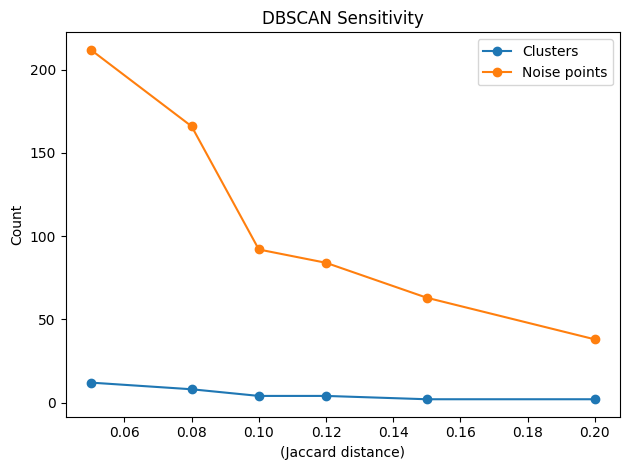

In [94]:
df = pd.DataFrame(db_result)
plt.plot(df["eps"], df["clusters"], marker="o", label="Clusters")
plt.plot(df["eps"], df["noise_points"], marker="o", label="Noise points")
plt.xlabel("(Jaccard distance)")
plt.ylabel("Count")
plt.title("DBSCAN Sensitivity")
plt.legend()
plt.tight_layout()
plt.show()


when groups made too strict (small eps), most paintings end up as 'noise' because they're not that identical to others. when groups made too loose (large eps), then almost all paintings quickly merge into just one or two huge clusters, meaning everything is considered 'similar' to everything else. This suggests there is no one clear-cut separation between his painting styles, instead, his color choices tend to be more of a gradual spectrum.

